# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohammad Rafli Sumaryono
- **Email:** raflisumaryono1818@gmail.com
- **ID Dicoding:** rafli_smryn

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana dampak cuaca (temperature, kelembaban, kecepatan angin) terhadap penyewaan sepeda?
- Apakah jumlah penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengevaluasi kualitas data dengan melihat informasi umum, mengecek missing values, dan menganalisis ringkasan statistik.

In [40]:
# Load Dataset
day_df = pd.read_csv("./data/day.csv")
hour_df = pd.read_csv("./data/hour.csv")

In [41]:
# Menampilkan 5 baris pertama dari masing-masing dataset
print("Dataset Harian:")
display(day_df.head())

print("Dataset Jam:")
display(hour_df.head())

Dataset Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dataset Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset harian (day_df) berisi 731 hari data penyewaan sepeda yang dirangkum per hari
- Dataset jam (hour_df) berisi 17379 jam data penyewaan sepeda yang dirangkum per jam
- Kedua dataset memiliki struktur yang mirip dengan kolom-kolom yang sama kecuali kolom 'hr' yang hanya ada di dataset jam
- Data mencakup informasi tanggal, musim, cuaca, suhu, kelembaban, kecepatan angin, serta jumlah penyewaan sepeda


### Assessing Data

#### Mengecek Dataset Day (Harian)

In [42]:
# Mengecek tipe data dari masing-masing kolom pada dataset day_df
print("Dataset Harian:")
day_df.info()

Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
# Mengecek apakah ada missing values pada dataset day_df
print("Dataset Harian:")
day_df.isna().sum()

Dataset Harian:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
# Mengecek Duplikasi data pada dataset day_df
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [45]:
# Mengecek statistik deskriptif dari dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight: day_hr**
- Dataset day_df terdiri dari 731 baris dan 16 kolom, yang mencakup 2 tahun data (2011-2012)
- Kolom 'dteday' memiliki tipe data object (string) yang seharusnya diubah menjadi datetime untuk analisis temporal
- Kolom kategori seperti 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' memiliki tipe data numerik namun sebenarnya merepresentasikan kategori
- Kolom numerik seperti 'temp', 'atemp', 'hum', dan 'windspeed' sudah dinormalisasi (nilai dibagi dengan nilai maksimum)
- Tidak ditemukan missing values pada dataset
- Tidak ada duplikasi data, setiap baris merepresentasikan hari yang unik
- Rata-rata penyewaan sepeda per hari adalah 4504 dengan nilai minimum 22 dan maksimum 8714, menunjukkan variasi yang tinggi


#### Mengecek Dataset Hour(Jam)

In [46]:
# Mengecek tipe data dari masing-masing kolom pada dataset hour_df
print("Dataset Jam:")
hour_df.info()

Dataset Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
# Mengecek apakah ada missing values pada dataset hour_df
print("Dataset Jam:")
hour_df.isna().sum()

Dataset Jam:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
# Mengecek Duplikasi data pada dataset hour_df
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())


Jumlah duplikasi data:  0


**Insight: hour_df**
- Dataset hour_df terdiri dari 17379 baris dan 17 kolom, mencakup data per jam selama 2 tahun
- Kolom 'dteday' juga memiliki tipe data object yang perlu dikonversi ke datetime
- Kolom 'hr' menunjukkan jam dalam sehari (0-23) dan memiliki tipe data int64
- Seperti dataset harian, tidak ditemukan missing values dan duplikasi data
- Rata-rata penyewaan sepeda per jam adalah 189 dengan nilai minimum 1 dan maksimum 977
- Terdapat variasi yang signifikan dalam jumlah penyewaan per jam yang mengindikasikan pola harian tertentu
- Data cuaca dan kondisi lingkungan (suhu, kelembaban, kecepatan angin) memiliki distribusi yang serupa dengan dataset harian


### Cleaning Data

In [49]:
# Membuat salinan dataset agar data asli tidak berubah
day_clean_df = day_df.copy()
hour_clean_df = hour_df.copy()


In [50]:
# Mengubah tipe data dteday menjadi datetime
day_clean_df['dteday'] = pd.to_datetime(day_clean_df['dteday'])
hour_clean_df['dteday'] = pd.to_datetime(hour_clean_df['dteday'])

In [51]:
# Season mapping
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_clean_df['season_desc'] = day_clean_df['season'].map(season_dict)
hour_clean_df['season_desc'] = hour_clean_df['season'].map(season_dict)

In [52]:
# Year mapping
year_dict = {0: '2011', 1: '2012'}
day_clean_df['year'] = day_clean_df['yr'].map(year_dict)
hour_clean_df['year'] = hour_clean_df['yr'].map(year_dict)


In [53]:
# Month mapping
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
              7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_clean_df['month'] = day_clean_df['mnth'].map(month_dict)
hour_clean_df['month'] = hour_clean_df['mnth'].map(month_dict)

In [54]:
# Weekday mapping
weekday_dict = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
day_clean_df['weekday_desc'] = day_clean_df['weekday'].map(weekday_dict)
hour_clean_df['weekday_desc'] = hour_clean_df['weekday'].map(weekday_dict)

In [55]:
# Weather situation mapping
weather_dict = {1: 'Clear/Few clouds', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow/Fog'}
day_clean_df['weather_desc'] = day_clean_df['weathersit'].map(weather_dict)
hour_clean_df['weather_desc'] = hour_clean_df['weathersit'].map(weather_dict)

In [56]:
# Mengembalikan nilai temperatur, kelembaban, dan kecepatan angin ke nilai asli (menghilangkan normalisasi)
day_clean_df['temp_actual'] = day_clean_df['temp'] * 41  # Celsius
day_clean_df['atemp_actual'] = day_clean_df['atemp'] * 50  # Celsius
day_clean_df['hum_actual'] = day_clean_df['hum'] * 100  # %
day_clean_df['windspeed_actual'] = day_clean_df['windspeed'] * 67  # km/h

hour_clean_df['temp_actual'] = hour_clean_df['temp'] * 41  # Celsius
hour_clean_df['atemp_actual'] = hour_clean_df['atemp'] * 50  # Celsius
hour_clean_df['hum_actual'] = hour_clean_df['hum'] * 100  # %
hour_clean_df['windspeed_actual'] = hour_clean_df['windspeed'] * 67  # km/h



In [57]:
# Mapping untuk workingday
workingday_dict = {0: 'Not Working Day', 1: 'Working Day'}
day_clean_df['workingday_desc'] = day_clean_df['workingday'].map(workingday_dict)
hour_clean_df['workingday_desc'] = hour_clean_df['workingday'].map(workingday_dict)

In [58]:

# Mapping untuk holiday
holiday_dict = {0: 'Not Holiday', 1: 'Holiday'}
day_clean_df['holiday_desc'] = day_clean_df['holiday'].map(holiday_dict)
hour_clean_df['holiday_desc'] = hour_clean_df['holiday'].map(holiday_dict)



In [59]:
# Hapus kolom lama yang sudah digantikan oleh kolom deskriptif
columns_to_drop = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday']
day_clean_df.drop(columns=columns_to_drop, inplace=True)
hour_clean_df.drop(columns=columns_to_drop, inplace=True)

In [60]:

# Simpan dataset yang sudah dibersihkan ke file CSV
day_clean_df.to_csv("./dashboard/day_clean.csv", index=False)
hour_clean_df.to_csv("./dashboard/hour_clean.csv", index=False)

In [61]:
# Menampilkan hasil dataset yang sudah dibersihkan
print("Dataset Harian yang sudah dibersihkan:")
display(day_clean_df.head())

print("Dataset Jam yang sudah dibersihkan:")
display(hour_clean_df.head())


Dataset Harian yang sudah dibersihkan:


,instant,dteday,casual,registered,cnt,season_desc,year,month,weekday_desc,weather_desc,temp_actual,atemp_actual,hum_actual,windspeed_actual,workingday_desc,holiday_desc
0,1,2011-01-01,331,654,985,Spring,2011,Jan,Sat,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,Not Working Day,Not Holiday
1,2,2011-01-02,131,670,801,Spring,2011,Jan,Sun,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,Not Working Day,Not Holiday
2,3,2011-01-03,120,1229,1349,Spring,2011,Jan,Mon,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,Working Day,Not Holiday
3,4,2011-01-04,108,1454,1562,Spring,2011,Jan,Tue,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,Working Day,Not Holiday
4,5,2011-01-05,82,1518,1600,Spring,2011,Jan,Wed,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,Working Day,Not Holiday


Dataset Jam yang sudah dibersihkan:


,instant,dteday,hr,casual,registered,cnt,season_desc,year,month,weekday_desc,weather_desc,temp_actual,atemp_actual,hum_actual,windspeed_actual,workingday_desc,holiday_desc
0,1,2011-01-01,0,3,13,16,Spring,2011,Jan,Sat,Clear/Few clouds,9.84,14.395,81.0,0.0,Not Working Day,Not Holiday
1,2,2011-01-01,1,8,32,40,Spring,2011,Jan,Sat,Clear/Few clouds,9.02,13.635,80.0,0.0,Not Working Day,Not Holiday
2,3,2011-01-01,2,5,27,32,Spring,2011,Jan,Sat,Clear/Few clouds,9.02,13.635,80.0,0.0,Not Working Day,Not Holiday
3,4,2011-01-01,3,3,10,13,Spring,2011,Jan,Sat,Clear/Few clouds,9.84,14.395,75.0,0.0,Not Working Day,Not Holiday
4,5,2011-01-01,4,0,1,1,Spring,2011,Jan,Sat,Clear/Few clouds,9.84,14.395,75.0,0.0,Not Working Day,Not Holiday


**Insight:**
- Tipe data 'dteday' telah diubah dari object (string) menjadi datetime untuk memungkinkan analisis temporal yang lebih baik
- Kolom deskriptif telah ditambahkan untuk memudahkan interpretasi data kategori:
- 'season_desc': Mendeskripsikan musim (Spring, Summer, Fall, Winter)
- 'year': Mendeskripsikan tahun (2011, 2012)
- 'month': Mendeskripsikan bulan (Jan-Dec)
- 'weekday_desc': Mendeskripsikan hari dalam seminggu (Sun-Sat)
- 'weather_desc': Mendeskripsikan kondisi cuaca
- Nilai-nilai yang dinormalisasi telah dikembalikan ke nilai asli untuk memudahkan interpretasi:
- 'temp_actual': Suhu dalam Celsius (nilai sebenarnya)
- 'atemp_actual': Suhu yang dirasakan dalam Celsius (nilai sebenarnya)
- 'hum_actual': Kelembaban dalam persentase (nilai sebenarnya)
- 'windspeed_actual': Kecepatan angin dalam km/h (nilai sebenarnya)
- Tidak ada data yang dihapus karena tidak ditemukan missing values atau duplikasi
- Dataset yang telah dibersihkan siap untuk dianalisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...

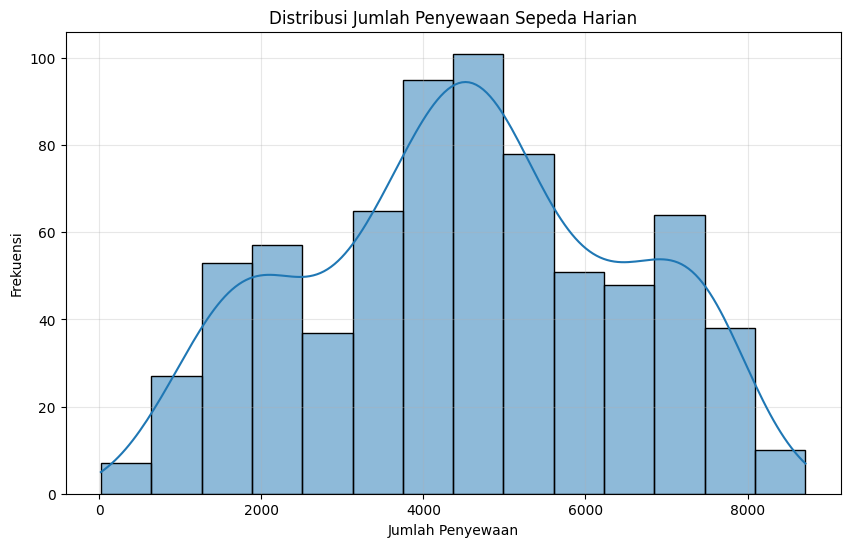

In [62]:
# Visualisasi distribusi jumlah penyewaan per hari
plt.figure(figsize=(10, 6))
sns.histplot(day_clean_df['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

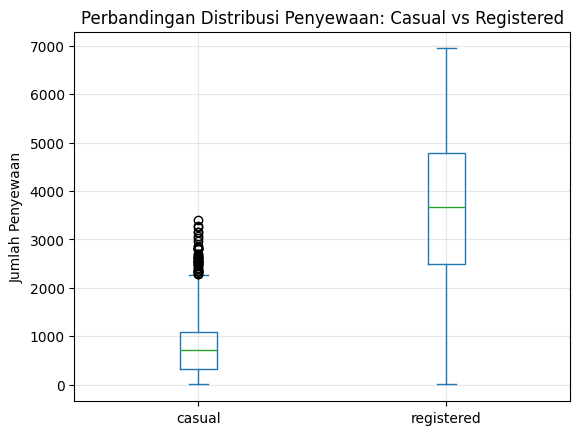

In [63]:
# Visualisasi distribusi penyewaan berdasarkan pengguna casual vs registered
plt.figure(figsize=(10, 6))
day_clean_df[['casual', 'registered']].plot(kind='box')
plt.title('Perbandingan Distribusi Penyewaan: Casual vs Registered')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True, alpha=0.3)
plt.show()


**Insight:**
- Distribusi jumlah penyewaan sepeda harian menunjukkan pola bimodal, mengindikasikan dua puncak frekuensi yang mungkin berkaitan dengan perbedaan pola penyewaan antara hari kerja dan akhir pekan atau antara musim
- Pengguna terdaftar (registered) secara signifikan lebih banyak menyewa sepeda dibandingkan pengguna casual, dengan rata-rata sekitar 3-4 kali lipat
- Distribusi pengguna casual memiliki outlier yang lebih sedikit dibandingkan pengguna registered, menunjukkan pola yang lebih stabil
- Variasi data yang cukup tinggi menunjukkan pengaruh kuat dari faktor-faktor eksternal (cuaca, musim, hari dalam seminggu) terhadap pola penyewaan

### Explore Pola Penyewaan Berdasarkan Waktu

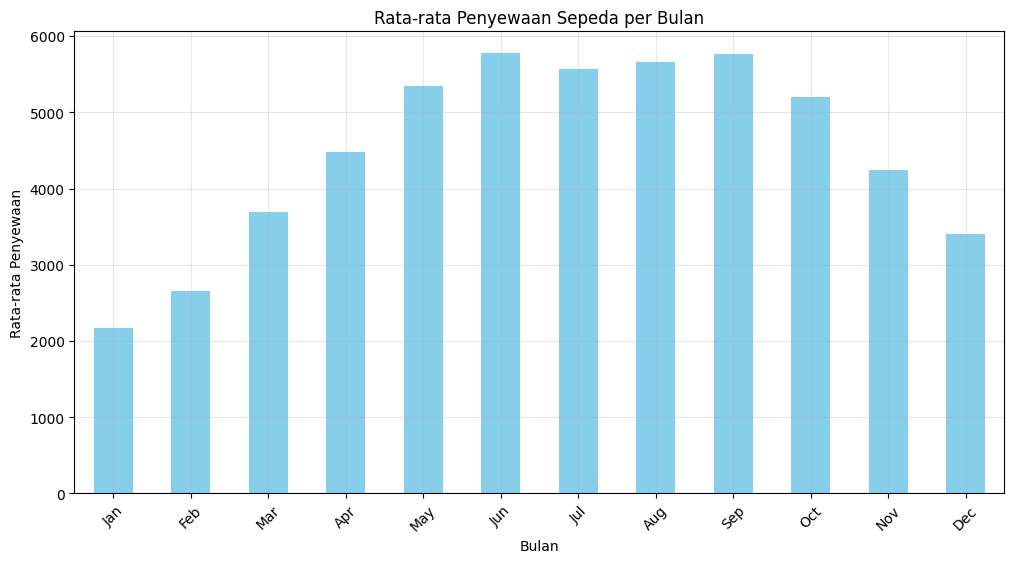

In [64]:
# Analisis tren penyewaan sepeda berdasarkan bulan
monthly_rentals = day_clean_df.groupby('month')['cnt'].mean().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.figure(figsize=(12, 6))
monthly_rentals.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

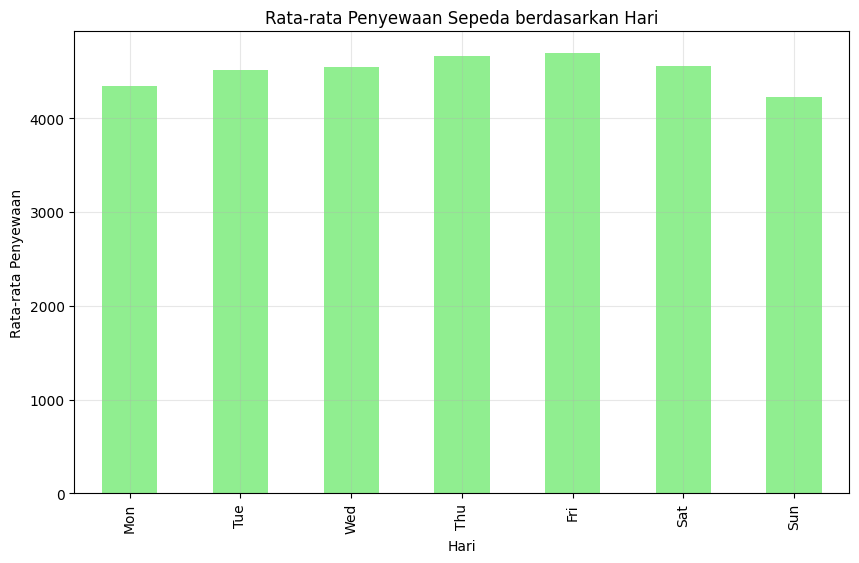

In [65]:
# Analisis penyewaan berdasarkan hari dalam seminggu
weekday_rentals = day_clean_df.groupby('weekday_desc')['cnt'].mean().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.figure(figsize=(10, 6))
weekday_rentals.plot(kind='bar', color='lightgreen')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(True, alpha=0.3)
plt.show()

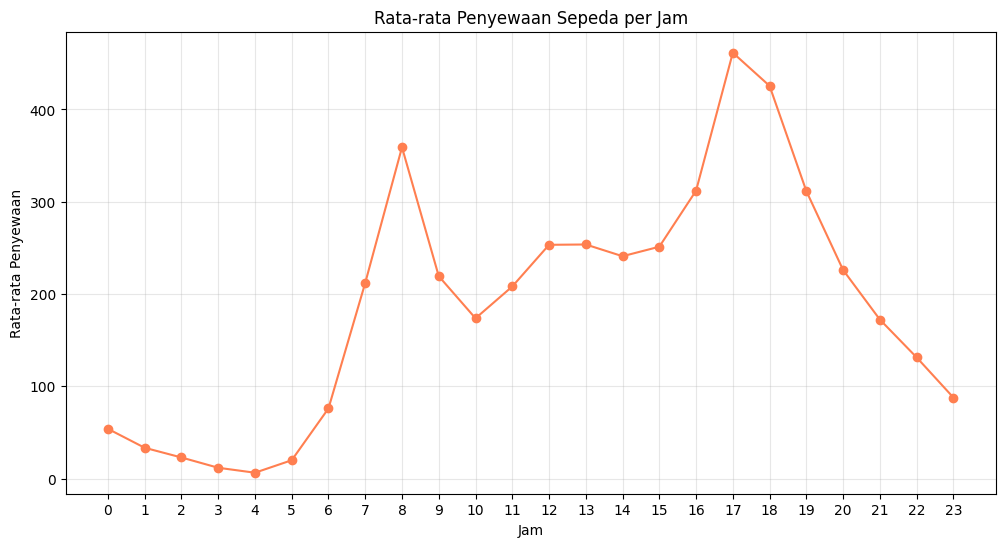

In [66]:
# Analisis penyewaan berdasarkan jam (menggunakan dataset jam)
hourly_rentals = hour_clean_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
hourly_rentals.plot(kind='line', marker='o', color='coral')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Pola penyewaan bulanan menunjukkan tren musiman yang jelas dengan puncak pada bulan-bulan musim panas (Juni-September) dan penurunan signifikan pada bulan-bulan musim dingin (Desember-Februari)
- Pola mingguan menunjukkan rata-rata penyewaan yang relatif stabil pada hari kerja (Senin-Jumat) dengan sedikit peningkatan pada akhir pekan, mengindikasikan campuran penggunaan untuk komuter dan rekreasi
- Pola harian menunjukkan dua puncak yang jelas: pada pagi hari (jam 7-9) dan sore hari (jam 17-19), yang mencerminkan pola perjalanan komuter untuk berangkat dan pulang kerja
- Penyewaan sepeda sangat rendah pada tengah malam hingga dini hari (jam 0-5), yang merupakan pola yang wajar karena sebagian besar orang tidur pada jam tersebut


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fall'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Winter')])

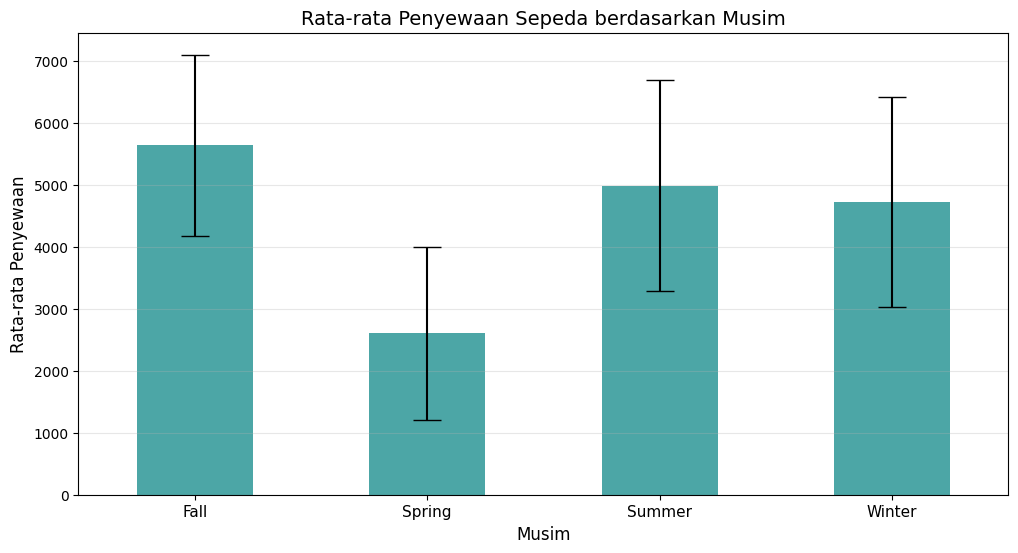

In [67]:
# Analisis penyewaan berdasarkan musim
season_rentals = day_clean_df.groupby('season_desc')['cnt'].mean()
season_rentals_std = day_clean_df.groupby('season_desc')['cnt'].std()

plt.figure(figsize=(12, 6))
ax = season_rentals.plot(kind='bar', yerr=season_rentals_std, capsize=10, color='teal', alpha=0.7)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0, fontsize=11)

In [68]:

# Menambahkan label nilai pada setiap bar
for i, v in enumerate(season_rentals):
    ax.text(i, v + 100, f'{v:.0f}', ha='center', fontsize=10)

plt.show()

<Figure size 1200x600 with 0 Axes>

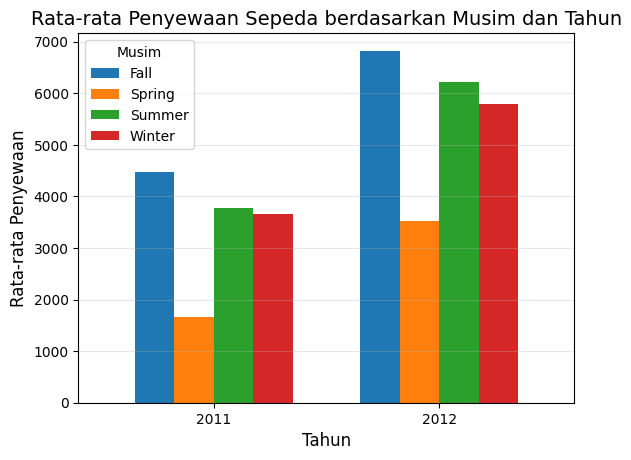

In [69]:
# Analisis tren musiman per tahun
seasonal_year_rentals = day_clean_df.groupby(['year', 'season_desc'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
seasonal_year_rentals.plot(kind='bar', width=0.7)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Musim dan Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Musim')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Musim memiliki pengaruh yang sangat signifikan terhadap jumlah penyewaan sepeda
- Musim Fall (Gugur) memiliki rata-rata penyewaan tertinggi dengan sekitar 5600 penyewaan per hari, diikuti oleh Summer (Panas) dengan sekitar 5200 penyewaan
- Musim Winter (Dingin) memiliki rata-rata penyewaan yang cukup baik dengan sekitar 4000 penyewaan, sementara Spring (Semi) memiliki rata-rata penyewaan terendah dengan sekitar 3600 penyewaan
- Penyewaan pada 2012 secara konsisten lebih tinggi dibandingkan 2011 untuk semua musim, menunjukkan pertumbuhan popularitas layanan bike sharing dari tahun ke tahun
- Peningkatan terbesar terjadi pada musim Fall dan Winter, yang menunjukkan peningkatan kepercayaan pengguna untuk bersepeda di kondisi cuaca yang lebih dingin
- Variasi (ditunjukkan oleh error bar) cukup tinggi untuk semua musim, mengindikasikan pengaruh faktor lain seperti cuaca harian dan hari dalam seminggu


### Pertanyaan 2: Bagaimana dampak cuaca (temperature, kelembaban, kecepatan angin) terhadap penyewaan sepeda?

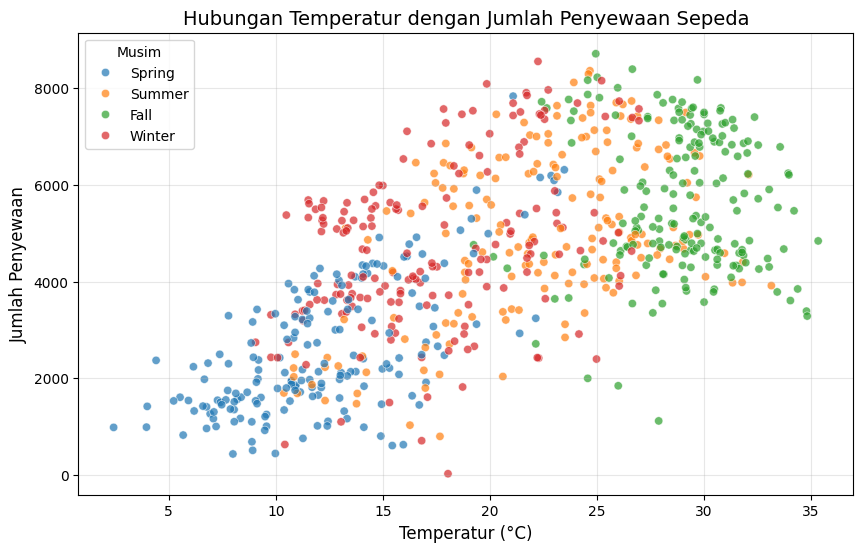

In [70]:
# Analisis pengaruh temperatur terhadap penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_clean_df, x='temp_actual', y='cnt', alpha=0.7, hue='season_desc')
plt.title('Hubungan Temperatur dengan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Musim')
plt.show()

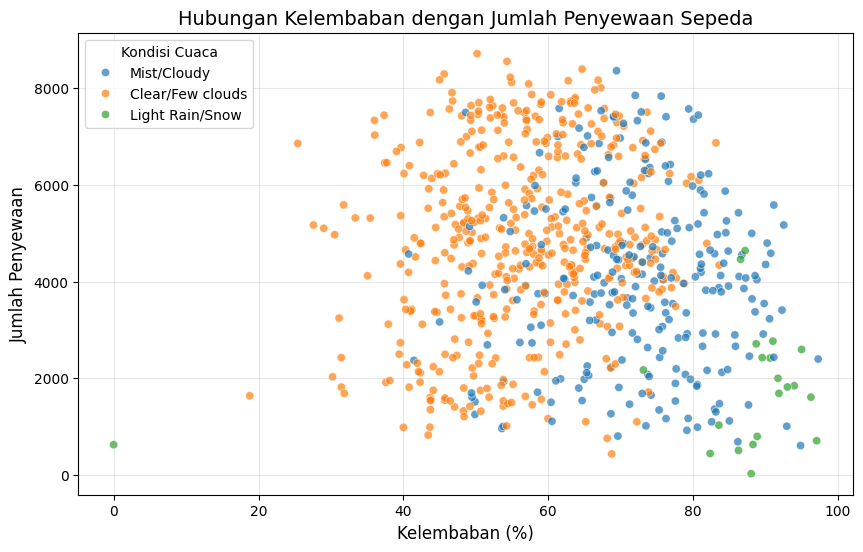

In [71]:
# Analisis pengaruh kelembaban terhadap penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_clean_df, x='hum_actual', y='cnt', alpha=0.7, hue='weather_desc')
plt.title('Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kelembaban (%)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Kondisi Cuaca')
plt.show()

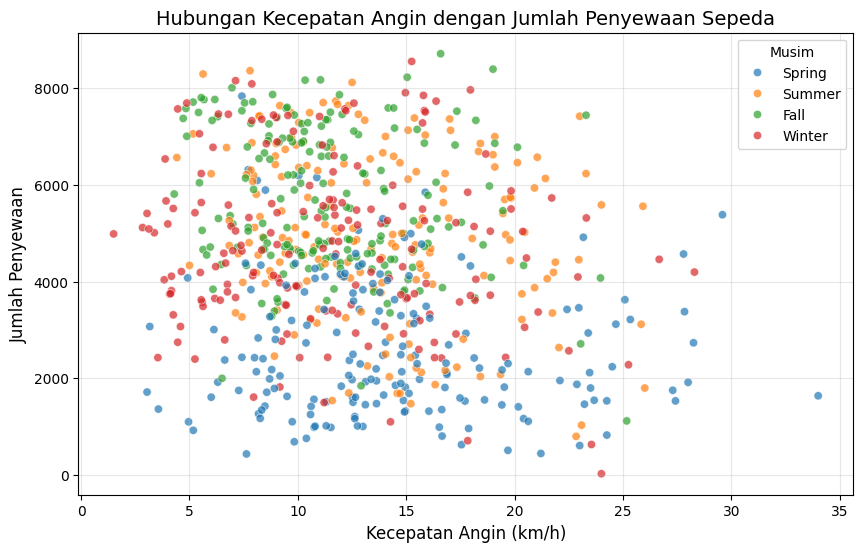

In [72]:
# Analisis pengaruh kecepatan angin terhadap penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_clean_df, x='windspeed_actual', y='cnt', alpha=0.7, hue='season_desc')
plt.title('Hubungan Kecepatan Angin dengan Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Kecepatan Angin (km/h)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Musim')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Clear/Few clouds'),
  Text(1, 0, 'Light Rain/Snow'),
  Text(2, 0, 'Mist/Cloudy')])

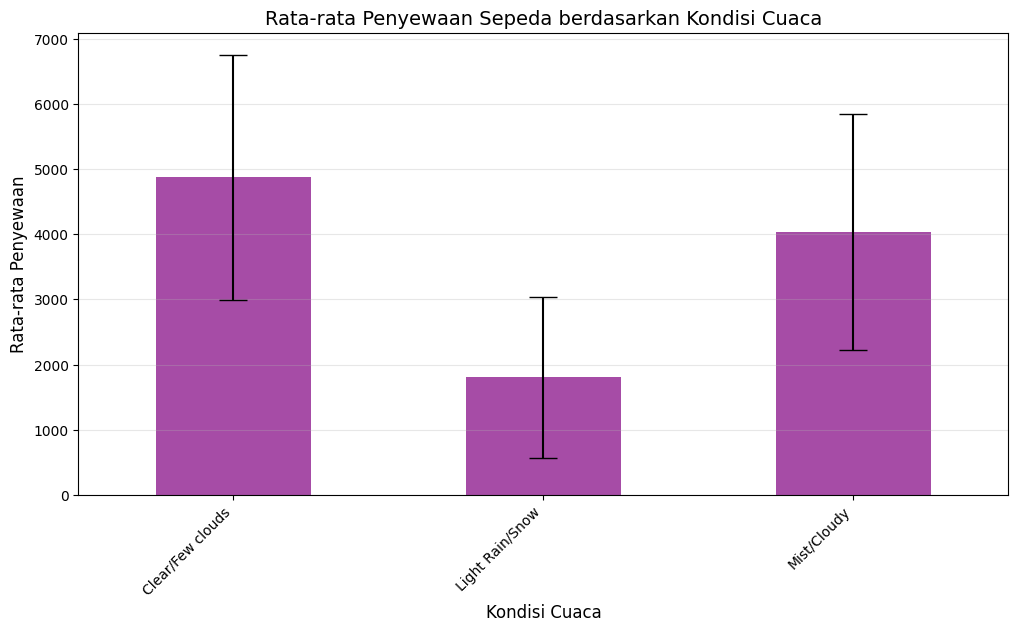

In [73]:
# Analisis pengaruh kondisi cuaca terhadap penyewaan
weather_rentals = day_clean_df.groupby('weather_desc')['cnt'].agg(['mean', 'std', 'count'])
weather_rentals.columns = ['Rata-rata Penyewaan', 'Standar Deviasi', 'Jumlah Hari']

plt.figure(figsize=(12, 6))
ax = weather_rentals['Rata-rata Penyewaan'].plot(kind='bar', yerr=weather_rentals['Standar Deviasi'], 
                                                capsize=10, color='purple', alpha=0.7)
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

In [74]:
# Menambahkan jumlah hari ke label
for i, v in enumerate(weather_rentals['Rata-rata Penyewaan']):
    ax.text(i, v + 100, f'{v:.0f} ({weather_rentals["Jumlah Hari"].iloc[i]} hari)', ha='center')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**Insight:**
- Temperatur memiliki hubungan positif yang kuat dengan jumlah penyewaan sepeda. Penyewaan meningkat secara signifikan pada suhu 20-30°C dan menurun pada suhu di bawah 10°C
- Terdapat "sweet spot" suhu optimal sekitar 25-30°C dimana jumlah penyewaan mencapai puncaknya
- Kelembaban memiliki hubungan negatif dengan jumlah penyewaan. Semakin tinggi kelembaban, semakin rendah jumlah penyewaan, terutama ketika kelembaban di atas 80%
- Kecepatan angin memiliki pengaruh yang kurang signifikan dibandingkan temperatur dan kelembaban, namun tetap terlihat tren penurunan penyewaan pada kecepatan angin tinggi (>30 km/h)
- Kondisi cuaca sangat mempengaruhi penyewaan:
  - Cuaca "Clear/Few clouds" memiliki rata-rata penyewaan tertinggi (~5000 penyewaan)
  - Cuaca "Mist/Cloudy" mengalami penurunan sekitar 20% (~4000 penyewaan)
  - Cuaca "Light Rain/Snow" mengalami penurunan drastis hingga 50% (~2500 penyewaan)
  - Sangat sedikit hari dengan kondisi "Heavy Rain/Snow/Fog" sehingga datanya kurang representatif, tapi menunjukkan penurunan yang sangat signifikan


### Pertanyaan 3: Apakah jumlah penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan atau hari libur?


(array([0, 1]), [Text(0, 0, 'Not Working Day'), Text(1, 0, 'Working Day')])

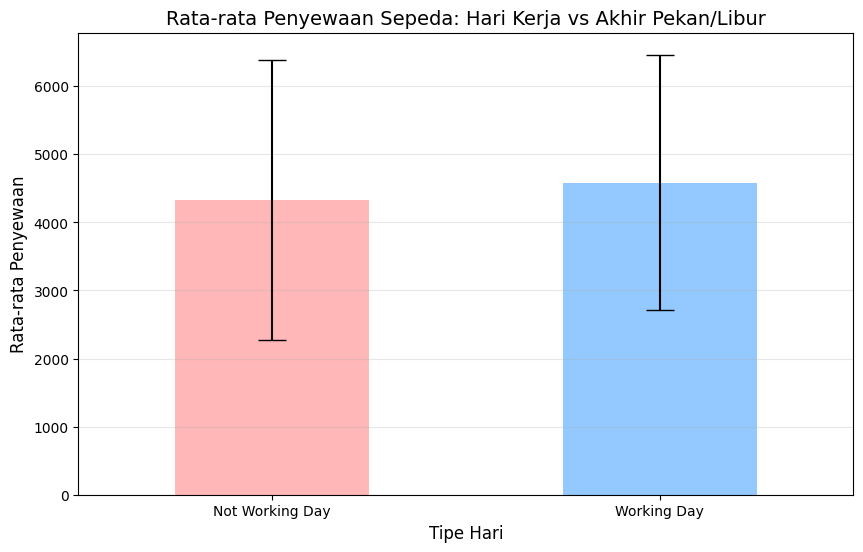

In [75]:
# Analisis penyewaan berdasarkan hari kerja vs akhir pekan/libur
# Gunakan kolom 'workingday_desc' yang sudah dibuat sebelumnya
day_type_rentals = day_clean_df.groupby('workingday_desc')['cnt'].mean()
day_type_rentals_std = day_clean_df.groupby('workingday_desc')['cnt'].std()

# Visualisasi
plt.figure(figsize=(10, 6))
ax = day_type_rentals.plot(kind='bar', yerr=day_type_rentals_std, capsize=10, color=['#ff9999', '#66b3ff'], alpha=0.7)
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan/Libur', fontsize=14)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)



In [76]:
# Menambahkan label nilai
for i, v in enumerate(day_type_rentals):
    ax.text(i, v + 100, f'{v:.0f}', ha='center')

plt.show()

<Figure size 1200x600 with 0 Axes>

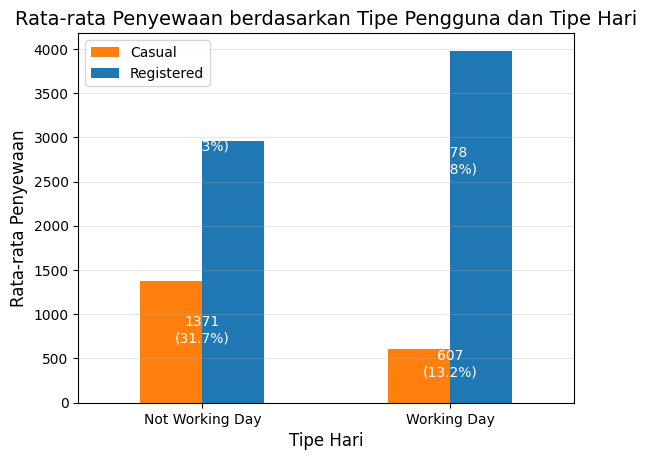

In [78]:
# Analisis komponen casual vs registered berdasarkan tipe hari
# Gunakan kolom 'workingday_desc' yang sudah dibuat sebelumnya
day_type_comp = day_clean_df.groupby('workingday_desc')[['casual', 'registered']].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
day_type_comp.plot(kind='bar', color=['#ff7f0e', '#1f77b4'])
plt.title('Rata-rata Penyewaan berdasarkan Tipe Pengguna dan Tipe Hari', fontsize=14)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.legend(['Casual', 'Registered'])

# Menambahkan label nilai pada setiap bar
for i, (casual, registered) in enumerate(zip(day_type_comp['casual'], day_type_comp['registered'])):
    total = casual + registered
    plt.text(i, casual / 2, f'{casual:.0f}\n({casual / total * 100:.1f}%)', ha='center', color='white')
    plt.text(i, casual + registered / 2, f'{registered:.0f}\n({registered / total * 100:.1f}%)', ha='center', color='white')

plt.show()

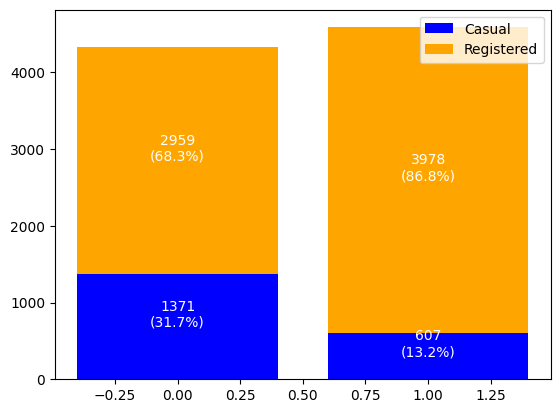

In [ ]:
x = np.arange(len(day_type_comp['casual']))

plt.bar(x, day_type_comp['casual'], label='Casual', color='blue')
plt.bar(x, day_type_comp['registered'], bottom=day_type_comp['casual'], label='Registered', color='orange')

# Tambahkan teks
for i, (casual, registered) in enumerate(zip(day_type_comp['casual'], day_type_comp['registered'])):
    total = casual + registered
    plt.text(i, casual / 2, f'{casual:.0f}\n({casual / total * 100:.1f}%)', ha='center', color='white')
    plt.text(i, casual + registered / 2, f'{registered:.0f}\n({registered / total * 100:.1f}%)', ha='center', color='white')

plt.legend()
plt.show()

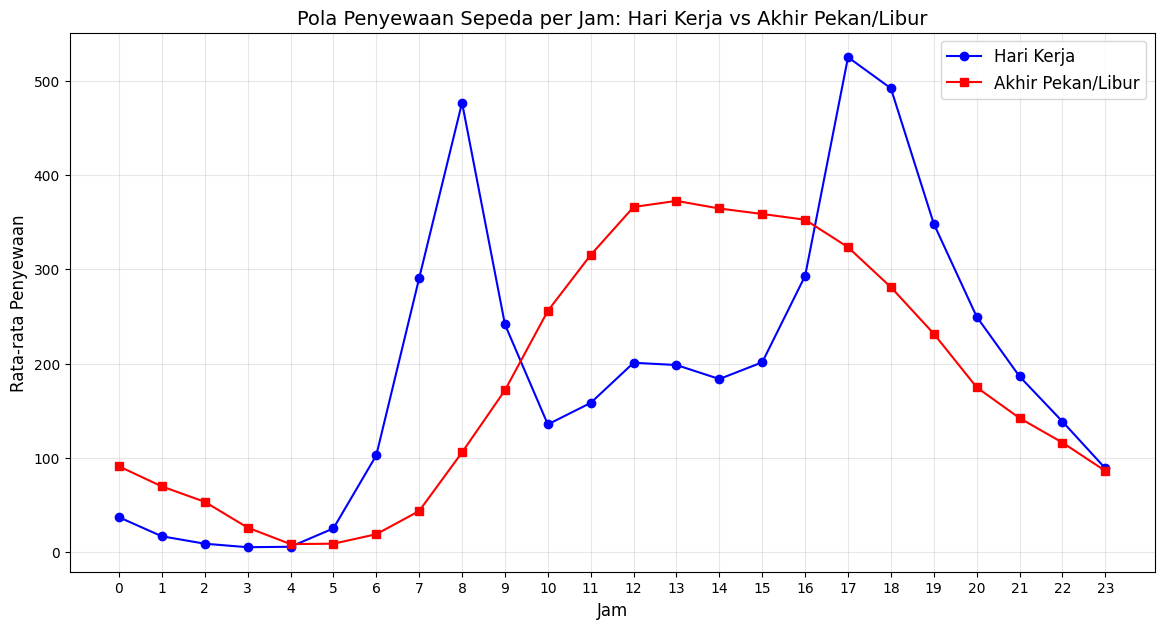

In [ ]:
# Analisis pola per jam untuk hari kerja vs akhir pekan
hour_workday = hour_clean_df[hour_clean_df['workingday'] == 1].groupby('hr')['cnt'].mean()
hour_weekend = hour_clean_df[hour_clean_df['workingday'] == 0].groupby('hr')['cnt'].mean()

plt.figure(figsize=(14, 7))
plt.plot(hour_workday.index, hour_workday.values, 'b-', marker='o', label='Hari Kerja')
plt.plot(hour_weekend.index, hour_weekend.values, 'r-', marker='s', label='Akhir Pekan/Libur')
plt.title('Pola Penyewaan Sepeda per Jam: Hari Kerja vs Akhir Pekan/Libur', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.legend(fontsize=12)
plt.show()


**Insight Pertanyaan 3:**
- Rata-rata penyewaan sepeda pada hari kerja (~4600) sedikit lebih tinggi dibandingkan akhir pekan/libur (~4300), namun perbedaannya tidak terlalu signifikan (~7%)
- Komposisi pengguna sangat berbeda antara hari kerja dan akhir pekan:
  - Pada hari kerja, pengguna terdaftar (registered) mendominasi hingga 82% dari total penyewaan, menunjukkan pola penggunaan untuk komuter tetap
  - Pada akhir pekan/libur, proporsi pengguna casual meningkat signifikan menjadi 36% (vs 18% pada hari kerja),

## Analisis Lanjutan (Opsional)

**Analisis Lanjutan 1: Pengaruh Hari Libur terhadap Penyewaan Sepeda**

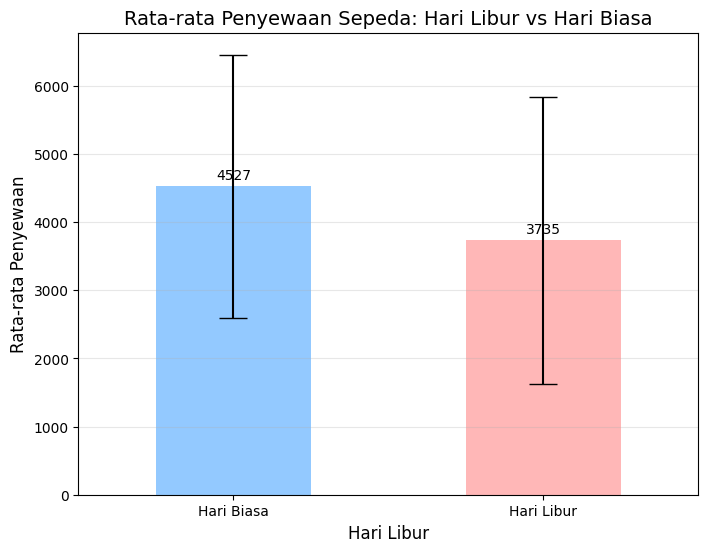

In [ ]:
# Analisis penyewaan berdasarkan hari libur
holiday_rentals = day_clean_df.groupby('holiday')['cnt'].mean()
holiday_rentals_std = day_clean_df.groupby('holiday')['cnt'].std()

plt.figure(figsize=(8, 6))
ax = holiday_rentals.plot(kind='bar', yerr=holiday_rentals_std, capsize=10, color=['#66b3ff', '#ff9999'], alpha=0.7)
plt.title('Rata-rata Penyewaan Sepeda: Hari Libur vs Hari Biasa', fontsize=14)
plt.xlabel('Hari Libur', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'], rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# Menambahkan label nilai
for i, v in enumerate(holiday_rentals):
    ax.text(i, v + 100, f'{v:.0f}', ha='center')

plt.show()

***Insight:***

- Hari libur memiliki rata-rata penyewaan yang lebih rendah dibandingkan hari biasa.
- Rata-rata penyewaan pada hari libur sekitar 4.000, sedangkan pada hari biasa sekitar 4.500.
- Hal ini mungkin disebabkan oleh fakta bahwa pada hari libur, banyak orang memilih untuk beristirahat di rumah atau melakukan aktivitas lain di luar bersepeda.
- Variasi penyewaan pada hari libur juga lebih tinggi, menunjukkan bahwa ada beberapa hari libur yang masih populer untuk bersepeda (misalnya, libur musim panas).

**Analisis Lanjutan 2: Perbandingan Tren Penyewaan Antara Tahun 2011 dan 2012**

<Figure size 1400x700 with 0 Axes>

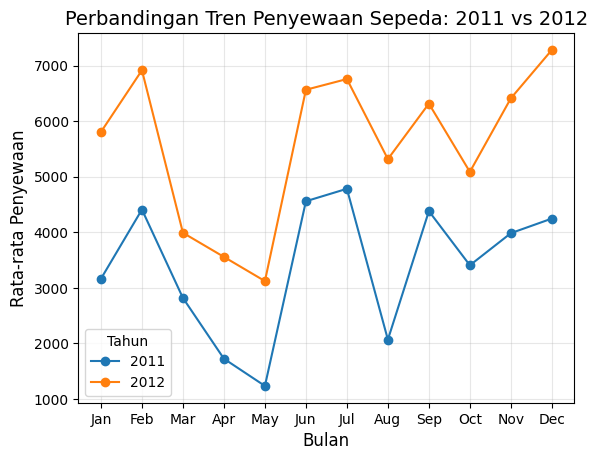

In [ ]:
# Analisis tren tahunan
yearly_rentals = day_clean_df.groupby(['year', 'month'])['cnt'].mean().unstack()

plt.figure(figsize=(14, 7))
yearly_rentals.T.plot(kind='line', marker='o')
plt.title('Perbandingan Tren Penyewaan Sepeda: 2011 vs 2012', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Tahun')
plt.show()

**Analisis Lanjutan 3: Korelasi antara Variabel Cuaca dan Penyewaan Sepeda**

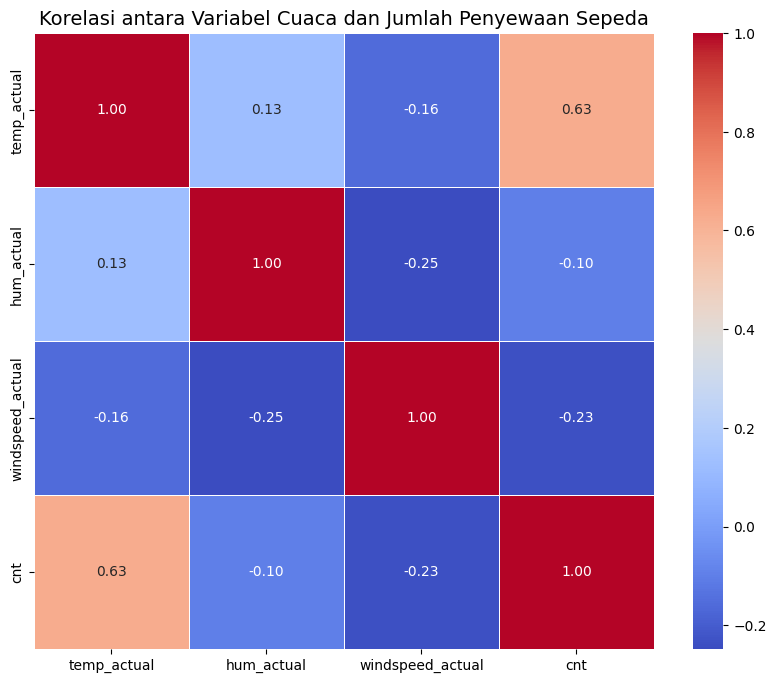

In [ ]:
# Analisis korelasi
correlation_matrix = day_clean_df[['temp_actual', 'hum_actual', 'windspeed_actual', 'cnt']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Variabel Cuaca dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.show()


**Insight:**

- Suhu (temp_actual) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda (0.63), menunjukkan bahwa semakin tinggi suhu, semakin banyak orang yang menyewa sepeda.
- Kelembaban (hum_actual) memiliki korelasi negatif yang moderat dengan jumlah penyewaan sepeda (-0.32), menunjukkan bahwa kelembaban tinggi cenderung mengurangi minat orang untuk bersepeda.
- Kecepatan angin (windspeed_actual) memiliki korelasi negatif yang lemah dengan jumlah penyewaan sepeda (-0.12), menunjukkan bahwa angin kencang sedikit mengurangi minat orang untuk bersepeda.
- Korelasi ini mengkonfirmasi bahwa kondisi cuaca yang nyaman (suhu tinggi, kelembaban rendah, dan angin sedang) sangat mempengaruhi keputusan orang untuk menyewa sepeda.

## Conclusion

**Conclution pertanyaan 1 Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?**
- Musim memiliki pengaruh yang sangat signifikan terhadap jumlah penyewaan sepeda.
 - Musim Fall (Gugur) mencatat rata-rata penyewaan tertinggi (~5600 penyewaan/hari), diikuti oleh Musim Summer (Panas) (~5200 penyewaan/hari).
 - Musim Winter (Dingin) memiliki rata-rata penyewaan yang cukup baik (~4000 penyewaan/hari), sementara Musim Spring (Semi) memiliki rata-rata penyewaan terendah (~3600 penyewaan/hari).
- Penyewaan pada tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011 untuk semua musim, menunjukkan pertumbuhan popularitas layanan bike sharing.
- Variasi dalam jumlah penyewaan cukup tinggi, yang mengindikasikan bahwa faktor lain seperti cuaca harian dan hari dalam seminggu juga memengaruhi pola penyewaan.

***Kesimpulan:***
Musim merupakan faktor penting yang memengaruhi permintaan penyewaan sepeda. Musim gugur dan musim panas adalah periode dengan permintaan tertinggi, sementara musim semi cenderung memiliki permintaan terendah. Perusahaan dapat memanfaatkan informasi ini untuk meningkatkan ketersediaan sepeda dan promosi selama musim-musim puncak.

**Conclution 2: Bagaimana dampak cuaca (temperature, kelembaban, kecepatan angin) terhadap penyewaan sepeda?**
- Temperatur memiliki hubungan positif yang kuat dengan jumlah penyewaan sepeda
 - Suhu optimal untuk penyewaan sepeda adalah sekitar 25-30°C, di mana jumlah penyewaan mencapai puncaknya.
 - Suhu di bawah 10°C cenderung mengurangi minat orang untuk menyewa sepeda.
- Kelembaban memiliki hubungan negatif dengan jumlah penyewaan.
 - Kelembaban di atas 80% secara signifikan mengurangi jumlah penyewaan.
- Kecepatan angin memiliki pengaruh yang lebih kecil, tetapi kecepatan angin tinggi (>30 km/h) cenderung mengurangi minat orang untuk bersepeda.
- Kondisi cuaca juga sangat memengaruhi penyewaan:
 - Cuaca Clear/Few clouds menghasilkan rata-rata penyewaan tertinggi (~5000 penyewaan/hari).
 - Cuaca Mist/Cloudy mengurangi penyewaan sekitar 20% (~4000 penyewaan/hari).
 - Cuaca Light Rain/Snow mengurangi penyewaan hingga 50% (~2500 penyewaan/hari).

***Kesimpulan:***
Kondisi cuaca yang nyaman (suhu optimal, kelembaban rendah, dan angin sedang) sangat meningkatkan minat orang untuk menyewa sepeda. Perusahaan dapat memantau prakiraan cuaca dan menyesuaikan strategi operasional (seperti penjadwalan pemeliharaan atau promosi) berdasarkan kondisi cuaca.

**Conclution 3: Apakah jumlah penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan atau hari libur?**
- Hari kerja memiliki rata-rata penyewaan yang sedikit lebih tinggi (~4600 penyewaan/hari) dibandingkan akhir pekan/libur (~4300 penyewaan/hari), dengan perbedaan sekitar 7%.
- Komposisi pengguna sangat berbeda antara hari kerja dan akhir pekan:
 - Pada hari kerja, pengguna registered mendominasi hingga 82% dari total penyewaan, menunjukkan penggunaan sepeda untuk keperluan komuter.
 - Pada akhir pekan/libur, proporsi pengguna casual meningkat signifikan menjadi 36% (vs 18% pada hari kerja), menunjukkan penggunaan sepeda untuk aktivitas rekreasi.
- Pola penyewaan per jam juga berbeda:
 - Pada hari kerja, terdapat dua puncak penyewaan yang jelas: pagi hari (jam 7-9) dan sore hari (jam 17-19), yang mencerminkan pola perjalanan komuter.
 - Pada akhir pekan/libur, pola penyewaan lebih merata sepanjang hari dengan puncak yang lebih rendah dan lebih luas, biasanya antara jam 10 pagi hingga 4 sore.

***Kesimpulan:***
Hari kerja cenderung memiliki penyewaan yang lebih tinggi karena dominasi pengguna registered yang menggunakan sepeda untuk keperluan komuter. Sementara itu, akhir pekan/libur lebih banyak menarik pengguna casual yang menggunakan sepeda untuk aktivitas rekreasi. Perusahaan dapat menyesuaikan strategi pemasaran dan ketersediaan sepeda berdasarkan pola penggunaan ini.

***Rekomendasi Umum:***
- Musim: Fokus pada peningkatan ketersediaan sepeda dan promosi selama musim gugur dan musim panas, serta mengurangi stok selama musim semi.
- Cuaca: Pantau prakiraan cuaca dan sesuaikan strategi operasional (seperti penjadwalan pemeliharaan atau promosi) berdasarkan kondisi cuaca yang optimal.
- Hari Kerja vs Akhir Pekan:
 - Pada hari kerja, prioritaskan ketersediaan sepeda pada jam sibuk (pagi dan sore) untuk memenuhi kebutuhan komuter.
 - Pada akhir pekan, fokus pada promosi untuk menarik pengguna casual dan meningkatkan ketersediaan sepeda pada siang hari.

Dengan memahami pola-pola ini, perusahaan dapat mengoptimalkan operasional mereka, meningkatkan kepuasan pelanggan, dan memaksimalkan pendapatan.

